<a href="https://colab.research.google.com/github/mohiiit71/Hotel-Power-BI-Dashboard/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df= pd.read_csv("/content/drive/MyDrive/datasets/Expanded_data_with_more_features.csv")

In [36]:
df.head(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [38]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [39]:
#df.drop("Unnamed: 0",axis = 1,inplace=True)

In [40]:
null_percentage=df.isnull().sum()/len(df)*100
null_percentage

,0
Unnamed: 0,0.000000
Gender,0.000000
EthnicGroup,6.005026
ParentEduc,6.021344
LunchType,0.000000
TestPrep,5.972390
ParentMaritalStatus,3.883685
PracticeSport,2.059332
IsFirstChild,2.950295
NrSiblings,5.130381


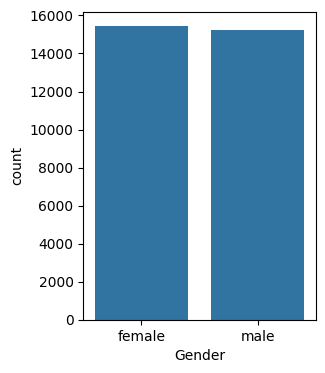

In [41]:
plt.figure(figsize=(3,4)) #to change bar chat size
sns.countplot(data=df,x="Gender")
plt.show()
#from this chat we can conclude that there are not females than males

In [42]:
group_by= df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
group_by

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


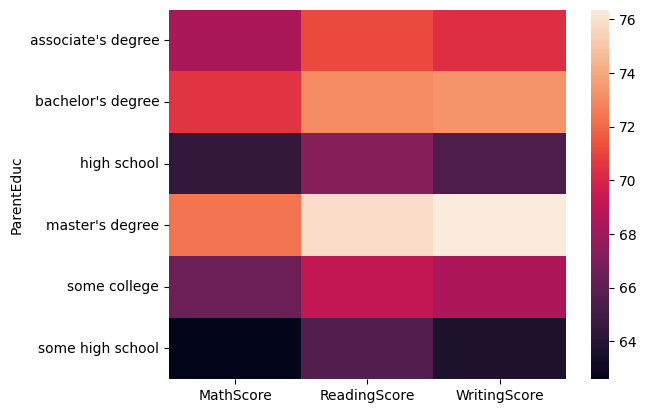

In [43]:
sns.heatmap(group_by)
plt.show()
#from this heatmap we can analysis that parents education is deeply impacting the students scores in subjects

In [44]:
group_by1= df_1.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
group_by1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


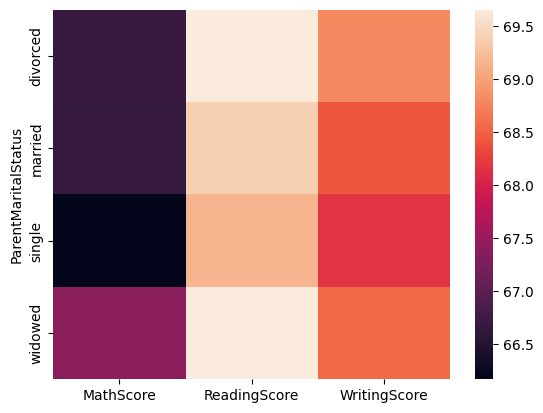

In [45]:
sns.heatmap(group_by1)
plt.show()
#in this heatmap we can identify that there is very low impact of parents marrital status on students marks

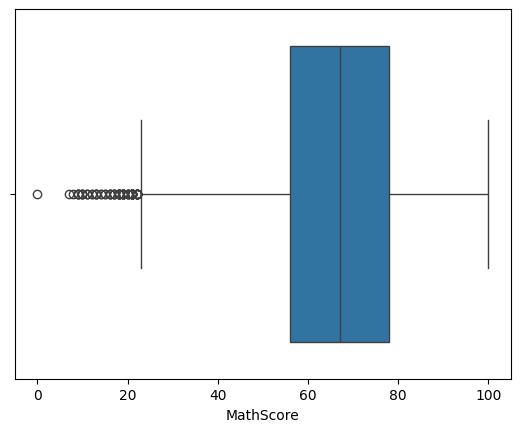

In [46]:
sns.boxplot(data= df, x="MathScore")
plt.show() #this has the lowest value of the three

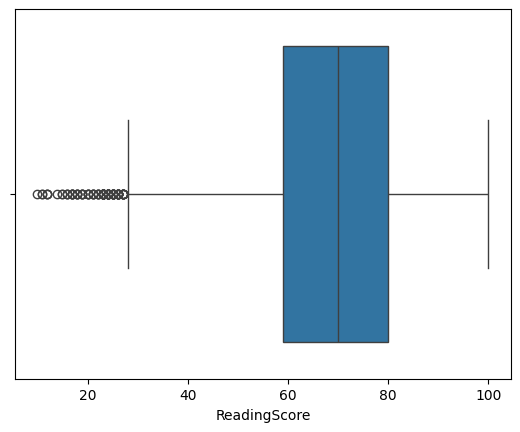

In [47]:
sns.boxplot(data= df, x="ReadingScore")
plt.show()

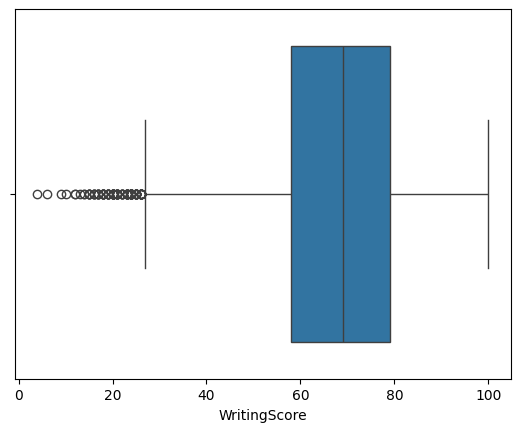

In [48]:
sns.boxplot(data= df, x="WritingScore")
plt.show()

In [49]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [63]:
Group_A= df.loc[(df["EthnicGroup"]== "group A")].count()
Group_B= df.loc[(df["EthnicGroup"]== "group B")].count()
Group_C= df.loc[(df["EthnicGroup"]== "group C")].count()
Group_D= df.loc[(df["EthnicGroup"]== "group D")].count()
Group_E= df.loc[(df["EthnicGroup"]== "group E")].count()
group_list=[Group_A["EthnicGroup"],Group_B["EthnicGroup"],Group_C["EthnicGroup"],Group_D["EthnicGroup"],Group_E["EthnicGroup"]]

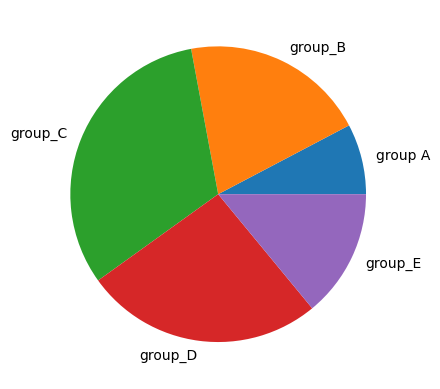

In [78]:
l=['group A','group_B','group_C','group_D','group_E']
plt.pie(group_list, labels=l)
plt.show() #shows the distribution of ethnic groups